<a href="https://colab.research.google.com/github/ngugialex/printf/blob/master/mobile_phone_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
import statsmodels.api as sm

In [7]:
df = pd.read_csv('/content/Mobile phone price.csv')

In [9]:
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [10]:
# Clean column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [11]:
df

,Brand,Model,Storage,RAM,Screen_Size_(inches),Camera_(MP),Battery_Capacity_(mAh),Price_($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [12]:
df['Brand'].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google', 'Oppo', 'Vivo',
       'Realme', 'Motorola', 'Nokia', 'Sony', 'LG', 'Asus', 'Blackberry',
       'CAT', 'Huawei'], dtype=object)

In [13]:
df['Brand'].value_counts()

Samsung       79
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: Brand, dtype: int64

In [14]:
model_counts = df['Model'].value_counts().reset_index().rename(columns={'index':'Model' , 'Model' : 'Count'})

In [15]:
model_counts

,Model,Count
0,Poco X3 Pro,6
1,Y33s,5
2,iPhone XR,5
3,C21Y,5
4,Redmi 10 Prime,5
...,...,...
234,Mi 11 Lite NE,1
235,Moto G Stylus 2021,1
236,A54s 5G,1
237,Galaxy M52,1


In [16]:
Brand_counts = df['Brand'].value_counts().reset_index().rename(columns={'index' : 'Brand' , 'Brand' : 'count'})

In [17]:
Brand_counts

,Brand,count
0,Samsung,79
1,Xiaomi,67
2,Oppo,56
3,Realme,43
4,Vivo,35
5,Apple,30
6,Nokia,28
7,Motorola,23
8,OnePlus,15
9,Huawei,12


In [19]:
df['Storage'] = df['Storage'].str.replace('GB','')

In [20]:
df['Storage'].head(20)

0     128 
1     256 
2     128 
3     128 
4     128 
5     128 
6     256 
7     128 
8     128 
9     256 
10    128 
11    128 
12    128 
13     64 
14    256 
15    128 
16    128 
17    128 
18    128 
19    128 
Name: Storage, dtype: object

In [21]:
df["Camera_(MP)"] = df["Camera_(MP)"].str.replace("MP","")
df["Camera_(MP)"] = df["Camera_(MP)"].str.replace("D","")

In [22]:
df["Camera_(MP)"] = df["Camera_(MP)"].str.split("+")

In [23]:
listx = []
for i in df.index:
    listx.append(df["Camera_(MP)"][i][0])

In [24]:
df["Camera_(MP)"] = listx

In [25]:
df["Camera_(MP)"] = df["Camera_(MP)"].astype("float64")

In [26]:
df['RAM'] = df['RAM'].str.replace('GB','')

In [27]:
df['RAM'].head(20)

0      6 
1     12 
2      8 
3      6 
4      8 
5      4 
6      8 
7      6 
8      8 
9     12 
10     6 
11     6 
12     8 
13     4 
14    12 
15     6 
16     8 
17     6 
18     6 
19     8 
Name: RAM, dtype: object

In [28]:
df['Price_($)'] = df['Price_($)'].str.replace('$','')

<ipython-input-28-d877e57c9688>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price_($)'] = df['Price_($)'].str.replace('$','')


In [30]:
df['Price_($)'] = df['Price_($)'].str.replace('$','')

<ipython-input-30-d877e57c9688>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price_($)'] = df['Price_($)'].str.replace('$','')


In [31]:
df['Price_($)'].head(20)

0      999
1     1199
2      899
3      279
4      799
5      799
6      999
7      249
8      699
9     1199
10     329
11     449
12     329
13     699
14    1199
15     329
16     799
17     199
18     299
19     379
Name: Price_($), dtype: object

In [32]:
df['Screen_Size_(inches)'].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [33]:
df = df[~(df["Screen_Size_(inches)"] == "6.8 + 3.9")]

In [34]:
df = df[~(df["Screen_Size_(inches)"] == "7.6 (unfolded)")]

In [35]:
df["Screen_Size_(inches)"] = df["Screen_Size_(inches)"].astype("float64")

In [36]:
df['Price_($)'] = pd.to_numeric(df['Price_($)'] , errors='coerce')

In [37]:
df['Storage'] = pd.to_numeric(df['Storage'] , errors='coerce')

In [38]:
df['RAM'] = pd.to_numeric(df['RAM'] , errors='coerce')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   405 non-null    object 
 1   Model                   405 non-null    object 
 2   Storage                 405 non-null    int64  
 3   RAM                     405 non-null    int64  
 4   Screen_Size_(inches)    405 non-null    float64
 5   Camera_(MP)             405 non-null    float64
 6   Battery_Capacity_(mAh)  405 non-null    int64  
 7   Price_($)               402 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 28.5+ KB


In [40]:
df.describe().T.style.background_gradient(cmap="Blues")

,count,mean,std,min,25%,50%,75%,max
Storage,405.000000,122.390123,64.445048,32.000000,64.000000,128.000000,128.000000,512.000000
RAM,405.000000,5.817284,2.416158,2.000000,4.000000,6.000000,8.000000,16.000000
Screen_Size_(inches),405.000000,6.467654,0.315946,4.500000,6.440000,6.500000,6.580000,6.900000
Camera_(MP),405.000000,43.345679,24.659403,8.000000,13.000000,48.000000,64.000000,108.000000
Battery_Capacity_(mAh),405.000000,4678.582716,798.404462,1821.000000,4300.000000,5000.000000,5000.000000,7000.000000
Price_($),402.000000,396.738806,280.214140,99.000000,199.000000,299.000000,466.500000,1399.000000


In [41]:
df.describe(include="O").T

,count,unique,top,freq
Brand,405,16,Samsung,78
Model,405,237,Poco X3 Pro,6


In [42]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen_Size_(inches)      0
Camera_(MP)               0
Battery_Capacity_(mAh)    0
Price_($)                 3
dtype: int64

In [43]:
df.duplicated().sum()

54

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.duplicated().any()

False

In [46]:
df.shape

(351, 8)

In [47]:
Mean_Price = df['Price_($)'].mean()

In [48]:
df['Price_($)'] = df['Price_($)'].fillna(Mean_Price)

In [49]:
df['Price_($)'].isnull().sum()

0

<ipython-input-50-ea333aedc8d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5)


<Axes: >

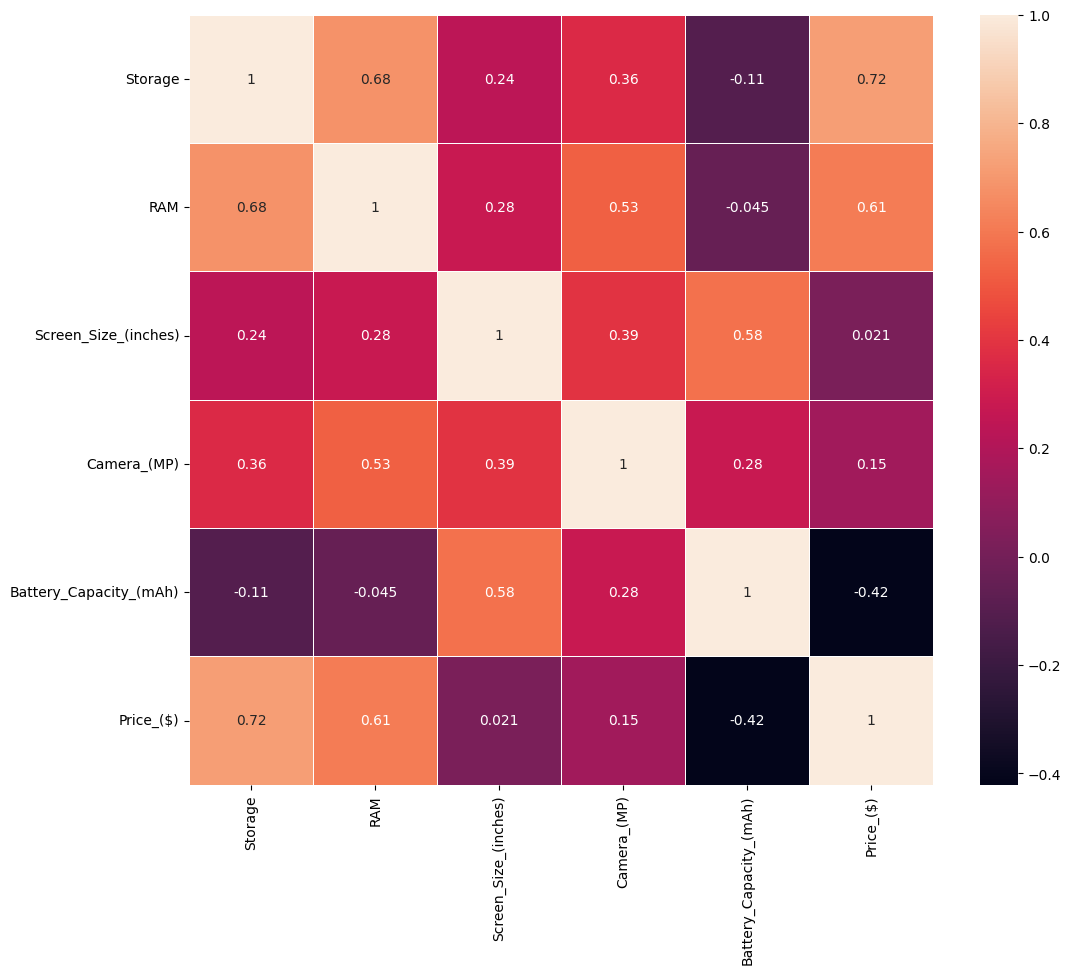

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5)

<Axes: xlabel='Battery_Capacity_(mAh)', ylabel='Brand'>

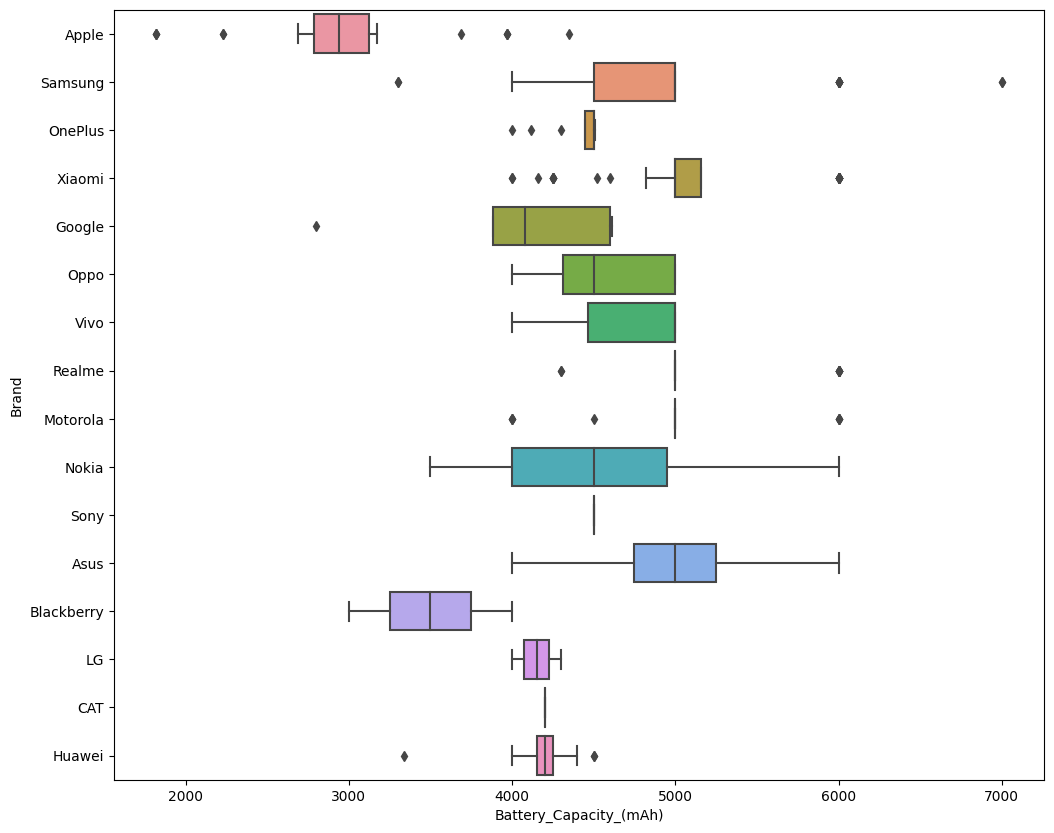

In [51]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Battery_Capacity_(mAh)", y="Brand", data=df)

Text(0.5, 1.0, '[Price vs Brand] by Screen Size')

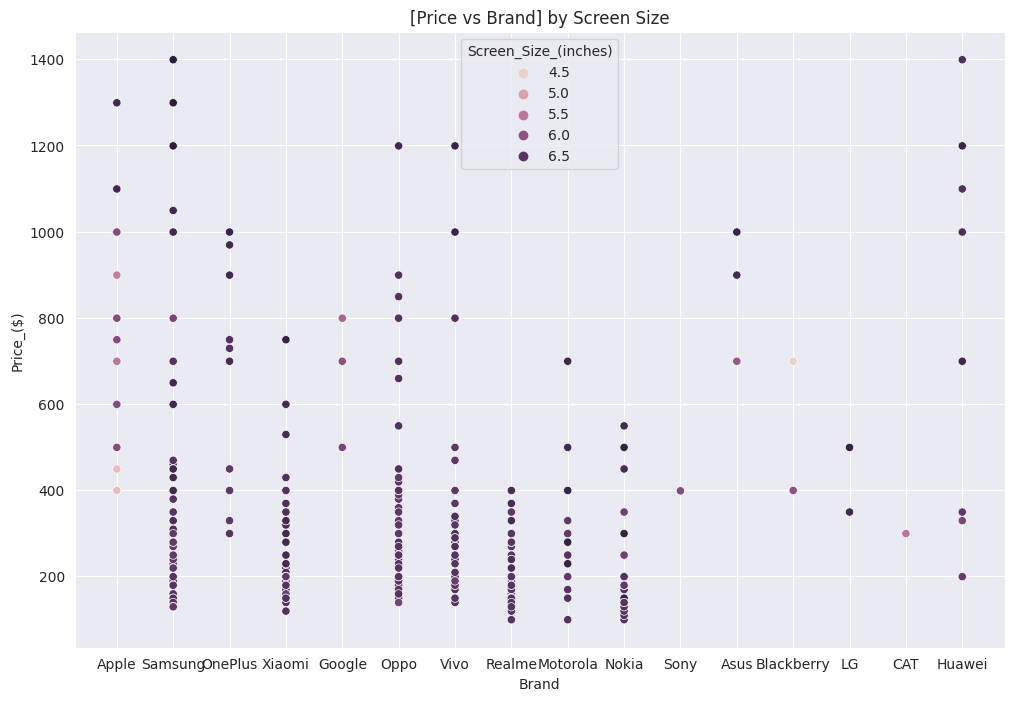

In [52]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.scatterplot(data=df,x="Brand",y="Price_($)",hue="Screen_Size_(inches)")
plt.title("[Price vs Brand] by Screen Size")

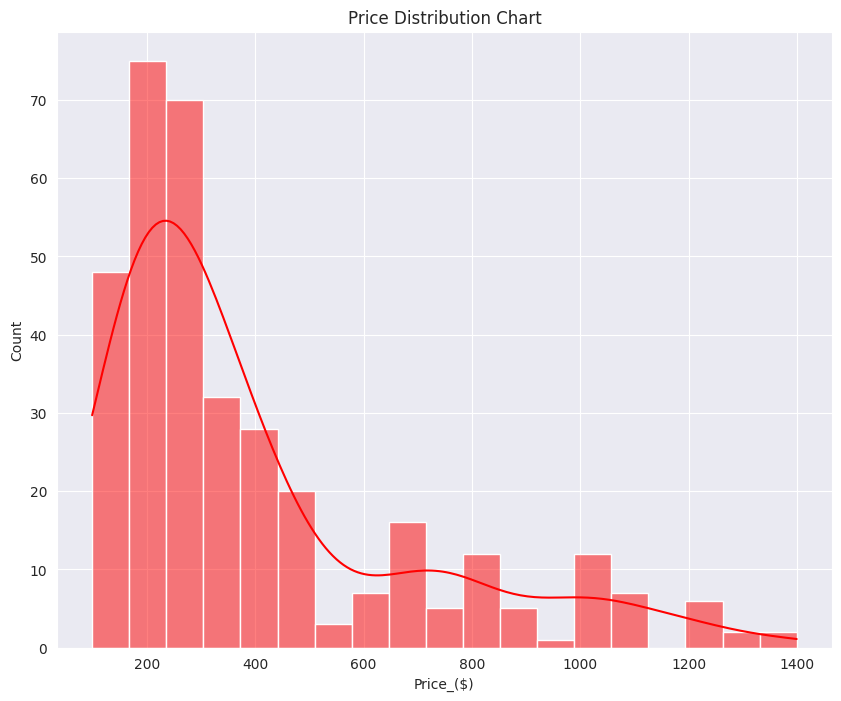

In [53]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df['Price_($)'], kde=True , color="Red")
plt.title('Price Distribution Chart')
plt.show()

In [54]:
df.columns

Index(['Brand', 'Model', 'Storage', 'RAM', 'Screen_Size_(inches)',
       'Camera_(MP)', 'Battery_Capacity_(mAh)', 'Price_($)'],
      dtype='object')

In [55]:
le = LabelEncoder()

In [56]:
Brand = LabelEncoder()
Model = LabelEncoder()

In [57]:
df['Brand'].value_counts()

Samsung       62
Xiaomi        57
Oppo          51
Realme        42
Vivo          30
Apple         24
Nokia         23
Motorola      22
OnePlus       12
Huawei        12
Google         5
Asus           4
Blackberry     3
LG             2
Sony           1
CAT            1
Name: Brand, dtype: int64

In [58]:
df['Brand'] = Brand.fit_transform(df['Brand'])

In [59]:
df['Brand'].value_counts()

12    62
15    57
10    51
11    42
14    30
0     24
8     23
7     22
9     12
5     12
4      5
1      4
2      3
6      2
13     1
3      1
Name: Brand, dtype: int64

In [60]:
Brand.classes_

array(['Apple', 'Asus', 'Blackberry', 'CAT', 'Google', 'Huawei', 'LG',
       'Motorola', 'Nokia', 'OnePlus', 'Oppo', 'Realme', 'Samsung',
       'Sony', 'Vivo', 'Xiaomi'], dtype=object)

In [61]:
df['Model'].value_counts()

A54                  5
C21Y                 5
Redmi 10 Prime       5
Redmi Note 10 Pro    4
iPhone 11            4
                    ..
Galaxy F42 5G        1
Edge 20 Fusion       1
C21                  1
Galaxy S21 Ultra     1
Reno3                1
Name: Model, Length: 237, dtype: int64

In [62]:
df['Model'] = Model.fit_transform(df['Model'])

In [63]:
df['Model'].value_counts()

30     5
45     5
169    5
177    4
222    4
      ..
84     1
49     1
44     1
100    1
187    1
Name: Model, Length: 237, dtype: int64

In [64]:
X = df.drop('Price_($)', axis=1)
y = df['Price_($)']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
df.shape

(351, 8)

In [67]:
X_train.shape

(280, 7)

In [68]:
X_test.shape

(71, 7)

In [69]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(X_train)
x_test = ro_scaler.fit_transform(X_test)

In [70]:
x_train.shape

(280, 7)

In [71]:
lin = LinearRegression()

In [72]:
lin.fit(X_train,y_train)

LinearRegression()

In [73]:
lin.score(X_train,y_train)

0.7761541180155267

In [74]:
lin.score(X_test , y_test)

0.7039138499892298

In [75]:
lin.coef_

array([-2.46195722e+01,  4.94838682e-01,  1.78023689e+00,  3.67246214e+01,
        2.21372585e+02, -1.09543747e+00, -8.94937137e-02])

In [76]:
lin.intercept_

-820.9851555963608

In [77]:
pd.DataFrame(lin.coef_ , df.columns[:-1] , columns = ["coeficient"])

,coeficient
Brand,-24.619572
Model,0.494839
Storage,1.780237
RAM,36.724621
Screen_Size_(inches),221.372585
Camera_(MP),-1.095437
Battery_Capacity_(mAh),-0.089494


In [78]:
y_pred = lin.predict(X_test)
y_pred

array([ 365.55692663,  707.28313205,  385.14274714,   42.08932958,
        305.18865064,  825.85366586,  894.74412137,   68.64873922,
        254.51520859,  320.74300157,  632.21446203,  328.45929011,
        335.74424381,  187.66373203,  342.44809903,  593.34797077,
        162.96583293,  429.04159407, 1049.98537855,  334.77741735,
        301.85936087,  450.55310078,  168.51348177,  335.99269742,
        415.58575657,  608.60474542,  255.58421422,  873.6520489 ,
        589.49322945,  301.77427264,  252.66151344,  285.87926214,
        366.05176531,  199.61606132,  230.37521041,  126.61169657,
         12.2316572 ,  342.94293771,   79.51460674,  298.16111898,
         87.47761122,  157.01188827,  562.33496661,  752.40442302,
         91.22515364,  117.4297265 ,  416.29476976,  407.1961488 ,
        176.97132493,  877.44140135,  481.21628736,  302.71445723,
        444.19703969,  913.79206308,   87.68913143,  204.30432571,
        227.77865511,  299.24854322,  853.49423067,  206.48494

In [79]:
df2 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
df2.head(10)

,Y_test,Y_predict
172,279.0,365.556927
396,599.0,707.283132
359,199.0,385.142747
261,99.0,42.089330
169,279.0,305.188651
305,799.0,825.853666
342,999.0,894.744121
253,249.0,68.648739
310,279.0,254.515209
202,299.0,320.743002


In [80]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.7039138499892298

In [81]:
p = len(x_train[0])
n = len(y_train)
adj_R2 = 1-(reg_score)*(n-1)/(n-p-1)
adj_R2

0.2779707200478121

In [83]:
mape = mean_absolute_percentage_error(y_test , y_pred)
mape

0.2841953674975525

In [84]:
mae = mean_absolute_error(y_test , y_pred)
mae

101.42020606805546

In [85]:
x2 = sm.add_constant(X)
est = sm.OLS(y , x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_($)   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     161.9
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.22e-104
Time:                        09:18:18   Log-Likelihood:                -2228.7
No. Observations:                 351   AIC:                             4473.
Df Residuals:                     343   BIC:                             4504.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -499

In [86]:
print(est2.rsquared_adj)

0.7629038255287853
